In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek


In [2]:
df=pd.read_csv('Data.csv')

In [6]:
df.head

<bound method NDFrame.head of      Taxi_dist  Market_dist  Hospital_dist  Carpet_area  Builtup_area  \
0       9796.0       5250.0        10703.0       1659.0        1961.0   
1       8294.0       8186.0        12694.0       1461.0        1752.0   
2      11001.0      14399.0        16991.0       1340.0        1609.0   
3       8301.0      11188.0        12289.0       1451.0        1748.0   
4      10510.0      12629.0        13921.0       1770.0        2111.0   
..         ...          ...            ...          ...           ...   
927    12176.0       8518.0        15673.0       1582.0        1910.0   
928     7214.0       8717.0        10553.0       1387.0        1663.0   
929     7423.0      11708.0        13220.0       1200.0        1436.0   
930    15082.0      14700.0        19617.0       1299.0        1560.0   
931     9297.0      12537.0        14418.0       1174.0        1429.0   

     Parking_type City_type  Rainfall  Price_house  
0            Open     CAT B       530   

In [7]:
df.shape

(932, 9)

In [8]:
df.drop(columns=['Parking_type','City_type','Rainfall'],inplace=True)

In [9]:
df.head

<bound method NDFrame.head of      Taxi_dist  Market_dist  Hospital_dist  Carpet_area  Builtup_area  \
0       9796.0       5250.0        10703.0       1659.0        1961.0   
1       8294.0       8186.0        12694.0       1461.0        1752.0   
2      11001.0      14399.0        16991.0       1340.0        1609.0   
3       8301.0      11188.0        12289.0       1451.0        1748.0   
4      10510.0      12629.0        13921.0       1770.0        2111.0   
..         ...          ...            ...          ...           ...   
927    12176.0       8518.0        15673.0       1582.0        1910.0   
928     7214.0       8717.0        10553.0       1387.0        1663.0   
929     7423.0      11708.0        13220.0       1200.0        1436.0   
930    15082.0      14700.0        19617.0       1299.0        1560.0   
931     9297.0      12537.0        14418.0       1174.0        1429.0   

     Price_house  
0        6649000  
1        3982000  
2        5401000  
3        5373000 

In [10]:
df.dropna(how='all',inplace=True)

In [11]:
df.isnull().sum()

Taxi_dist        13
Market_dist      13
Hospital_dist     1
Carpet_area       8
Builtup_area     15
Price_house       0
dtype: int64

In [12]:
print(df.duplicated().sum())

0


In [14]:
for col in df.columns:
    if df[col].dtype==['object']:
        df[col]=df[col].fillna(df[col].mode(0))
    else:
        df[col]=df[col].fillna(df[col].median())

In [17]:
categorize_col=df.select_dtypes(include='object').columns
for col in categorize_col:
    df[col]=LabelEncoder().fit_transform(df[col])

In [20]:
column_to_scale=['Taxi_dist','Market_dist','Hospital_dist','Builtup_area','Carpet_area']
scaler=StandardScaler()
df[column_to_scale]=scaler.fit_transform(df[column_to_scale])

In [21]:
df.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Price_house
0,0.615994,-2.285624,-0.916982,0.187267,0.358545,6649000
1,0.025276,-1.122759,-0.146376,-0.064274,-0.091759,3982000
2,1.089905,1.338034,1.516754,-0.217994,-0.399861,5401000
3,0.028029,0.066248,-0.303129,-0.076978,-0.100377,5373000
4,0.896801,0.636987,0.328527,0.328283,0.681730,4662000


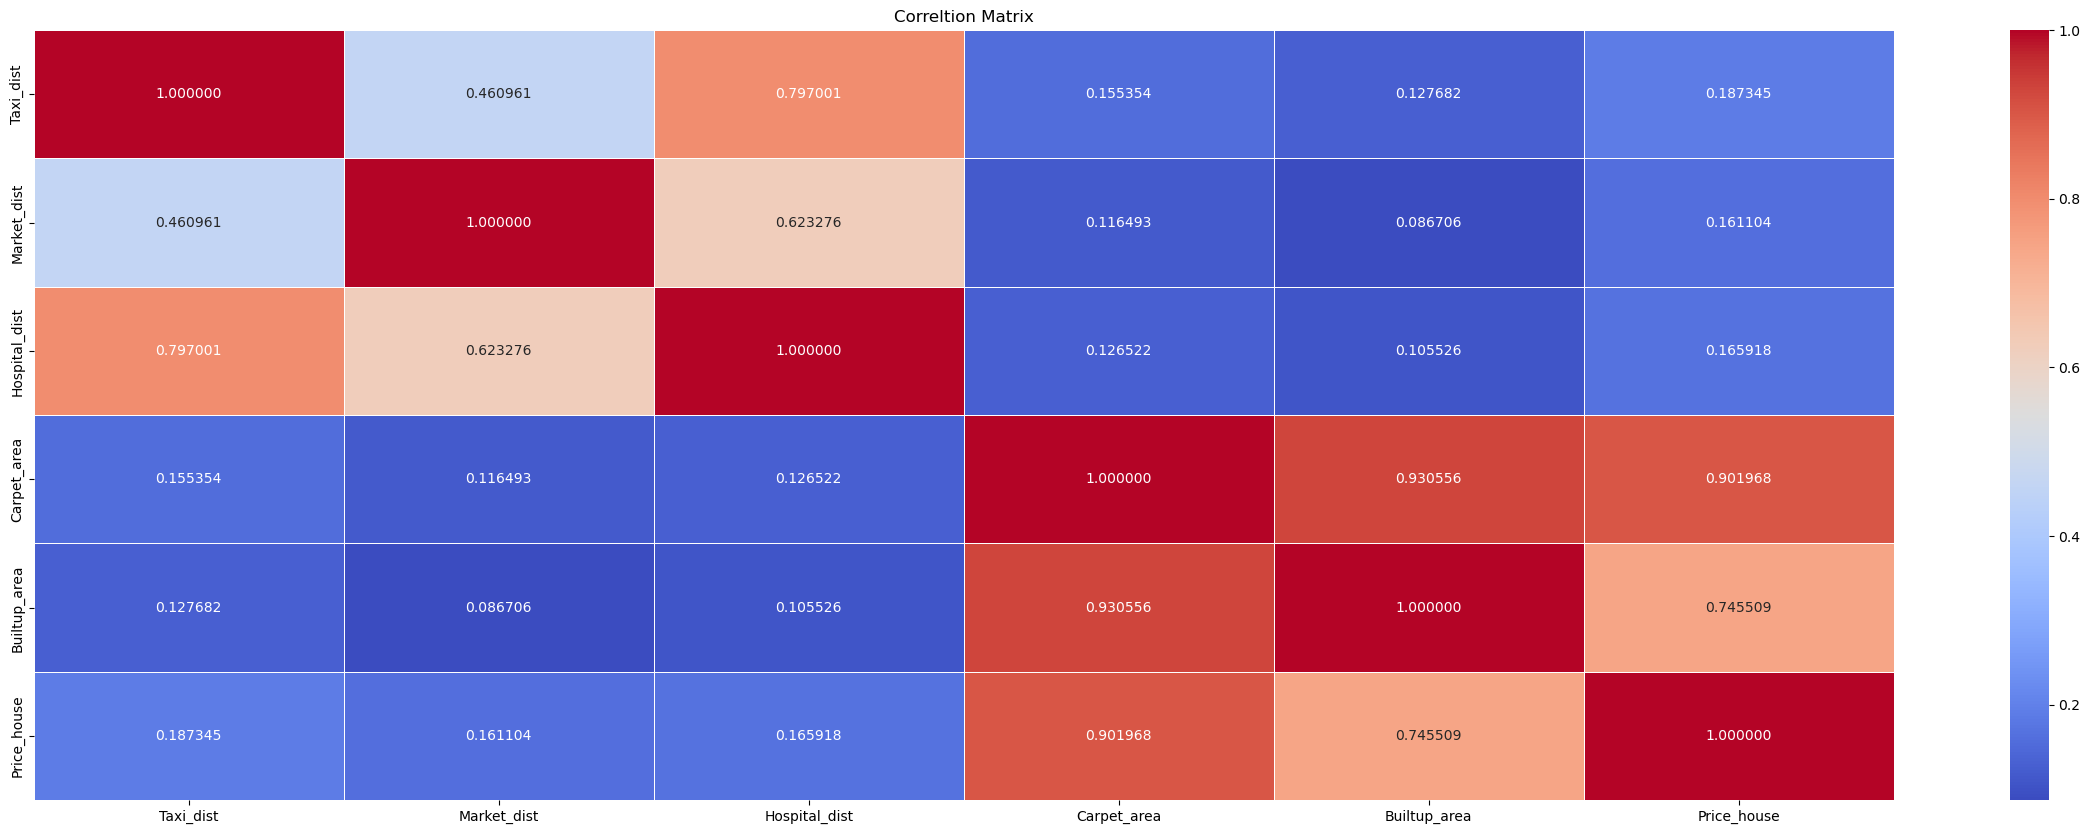

In [24]:
corr_matrix=df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='2f', linewidth=.5)
plt.title('Correltion Matrix')
plt.show()

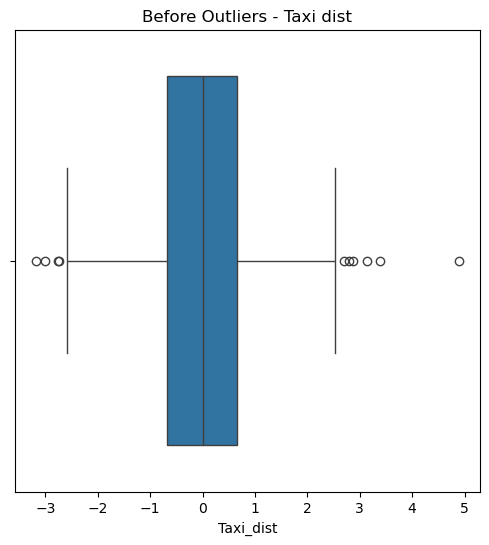

In [25]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Taxi_dist'])
plt.title('Before Outliers - Taxi dist')
plt.show()

In [26]:
Q1=df['Taxi_dist'].quantile(0.25)
Q3=df['Taxi_dist'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
df=df[(df['Taxi_dist']>=lower)&(df['Taxi_dist']<=upper)]

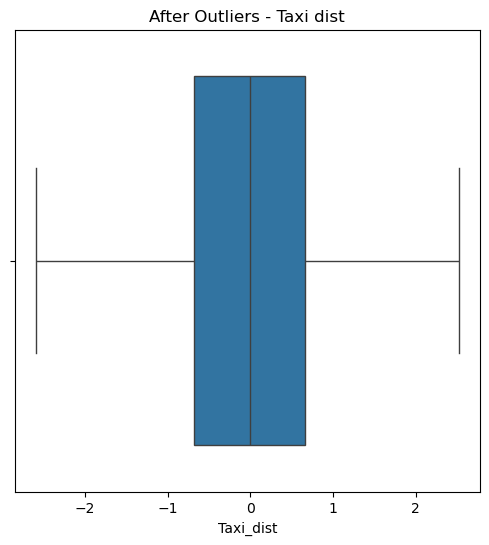

In [27]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Taxi_dist'])
plt.title('After Outliers - Taxi dist')
plt.show()

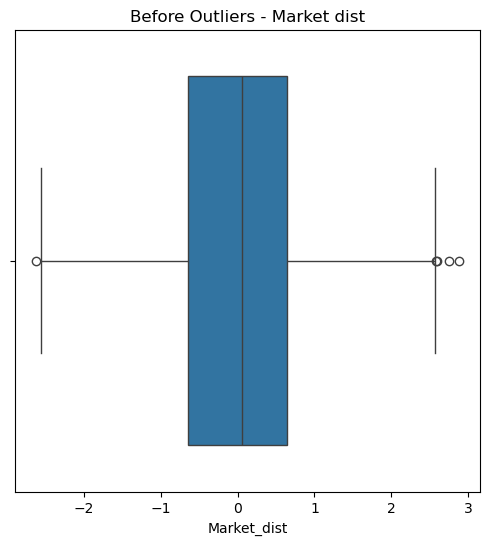

In [28]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Market_dist'])
plt.title('Before Outliers - Market dist')
plt.show()

In [29]:
Q1=df['Market_dist'].quantile(0.25)
Q3=df['Market_dist'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
df=df[(df['Market_dist']>=lower)&(df['Market_dist']<=upper)]

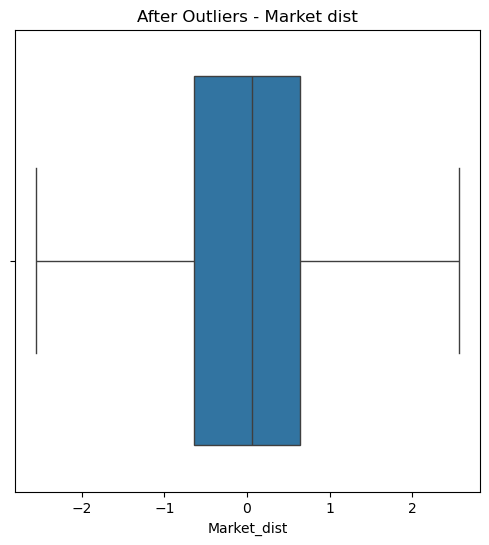

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Market_dist'])
plt.title('After Outliers - Market dist')
plt.show()

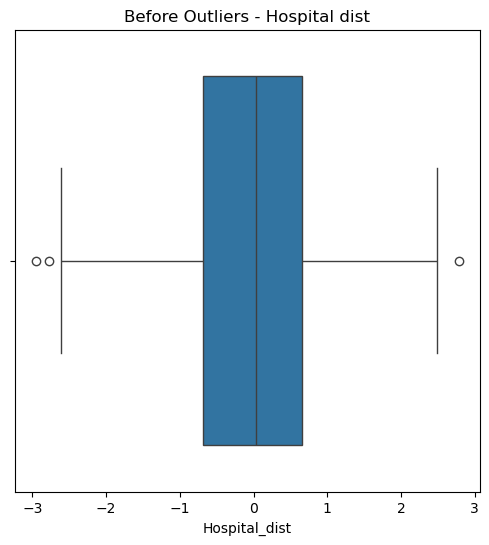

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Hospital_dist'])
plt.title('Before Outliers - Hospital dist')
plt.show()

In [32]:
Q1=df['Hospital_dist'].quantile(0.25)
Q3=df['Hospital_dist'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
df=df[(df['Hospital_dist']>=lower)&(df['Hospital_dist']<=upper)]

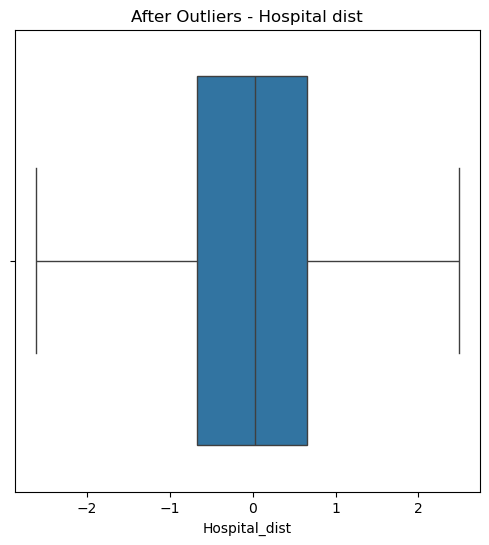

In [33]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Hospital_dist'])
plt.title('After Outliers - Hospital dist')
plt.show()

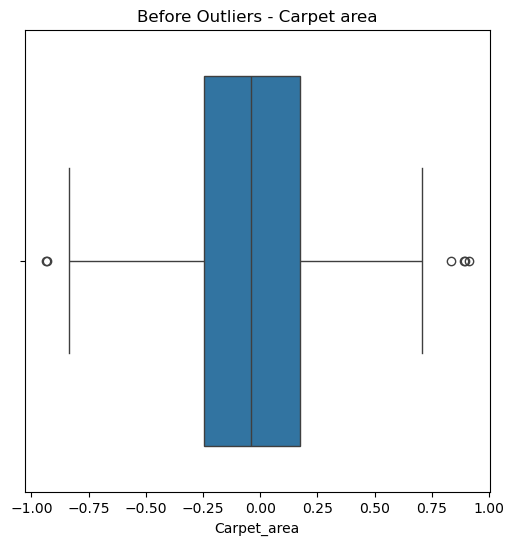

In [34]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Carpet_area'])
plt.title('Before Outliers - Carpet area')
plt.show()

In [35]:
Q1=df['Carpet_area'].quantile(0.25)
Q3=df['Carpet_area'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
df=df[(df['Carpet_area']>=lower)&(df['Carpet_area']<=upper)]

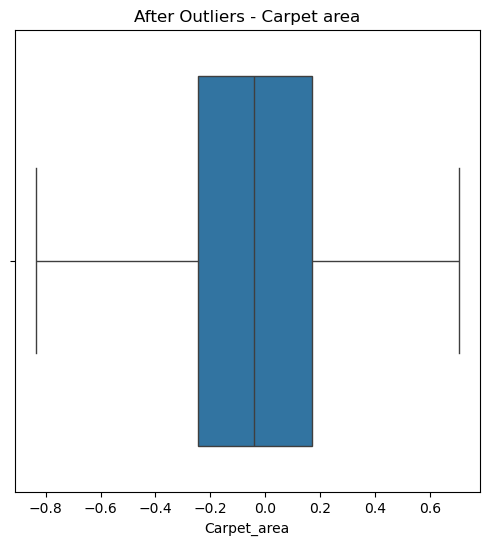

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Carpet_area'])
plt.title('After Outliers - Carpet area')
plt.show()

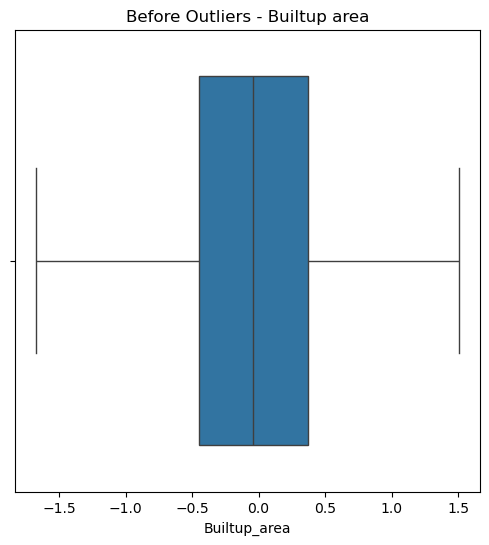

In [37]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Builtup_area'])
plt.title('Before Outliers - Builtup area')
plt.show()

In [38]:
Q1=df['Builtup_area'].quantile(0.25)
Q3=df['Builtup_area'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
df=df[(df['Builtup_area']>=lower)&(df['Builtup_area']<=upper)]

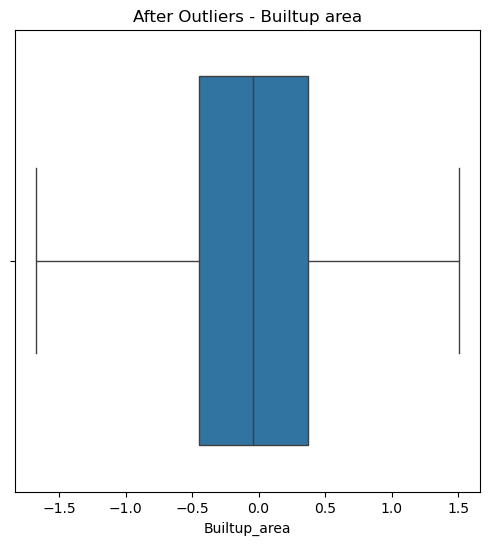

In [39]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['Builtup_area'])
plt.title('After Outliers - Builtup area')
plt.show()

In [40]:
print(df['Price_house'].value_counts())

Price_house
5459000    3
6354000    3
7887000    2
4605000    2
4895000    2
          ..
3488000    1
7062000    1
8208000    1
7644000    1
6636000    1
Name: count, Length: 827, dtype: int64


In [41]:
X=df.drop(columns=['Price_house'])
y=df['Price_house']

In [43]:
balance=TomekLinks()
X_resampled, y_resampled = balance.fit_resample(X,y)
print(f'Resampled Size: {y_resampled.value_counts()}')

Resampled Size: Price_house
7712000    2
6366000    2
6302000    2
7978000    2
6228000    2
          ..
7669000    1
4910000    1
5299000    1
4243000    1
8722000    1
Name: count, Length: 421, dtype: int64


In [44]:
X=X_resampled
y=y_resampled

In [47]:
df=pd.concat([X,y],axis=1)
df.to_csv('Data_updated.csv',index=False)